<a href="https://colab.research.google.com/github/ricardoricrob76/gerdau/blob/main/GERDAU_Aula_03_SkLearning_Modelos_de_Classifica%C3%A7%C3%A3o_Diabetes_Pima_Data_M%C3%A9tricas_e_Valida%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
# GERDAU - Treinamento InCompany
# Autor:  Profº - Ricardo Roberto de Lima - FABWORK
# Ciência de Dados com Python + Pandas, Numpy, SkLearning. Diabetes
# Machine Learning - Aula 03 - Modelos de Classificação - Algoritmo Naive Bayes e Métricas de Validação.
# Algoritmos: Naive Bayes - Randon Forest - Regressão Logística.

In [51]:
# Importando a biblioteca pandas para carregar e visualizar a base de dados
#Conjunto de importacoes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

# Adaptar para o Ambiente da GERDAU.
# import awswrangler as wr

# import boto3
# boto3.setup_default_session(region_name="us-east-2")

In [52]:
# Estrutura Inicial para um Projeto de Machine Learning.
from IPython.display import Image
Image('Workflow.png')

In [53]:
# Criar um Objeto do tipo DataFrame - Chamado DF_diabetes
#Carrega o dataset com os dados para o treinamento e validacao
df_diabetes = pd.read_csv("diabetes.csv", encoding="utf-8")

# Criar um Objeto do tipo DataFrame no Ambiente Big Data - Gerdau
# df_diabetes = pd.read_csv("s3://gerdau-analytics/gdata/datascience/diabetes.csv", encoding="utf-8")


In [54]:
# Visualizando as 10 primeiras linhas do meu Data Frame - Cancer de Mama.
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [55]:
# Mostrando uma descrição do Data Frame com a operação describe
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [56]:
# Verificando o formato dos dados
df_diabetes.shape

(768, 9)

In [57]:
print(df_diabetes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [59]:
#Definição dos atributos que deverao ser treinados para gerar o modelo de classificacao
data_treino = np.array(df_diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
#Definição do atributo de classificacao
data_classif = np.array(df_diabetes['Outcome'])

In [60]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df_diabetes, size=35):
    corr = df_diabetes.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

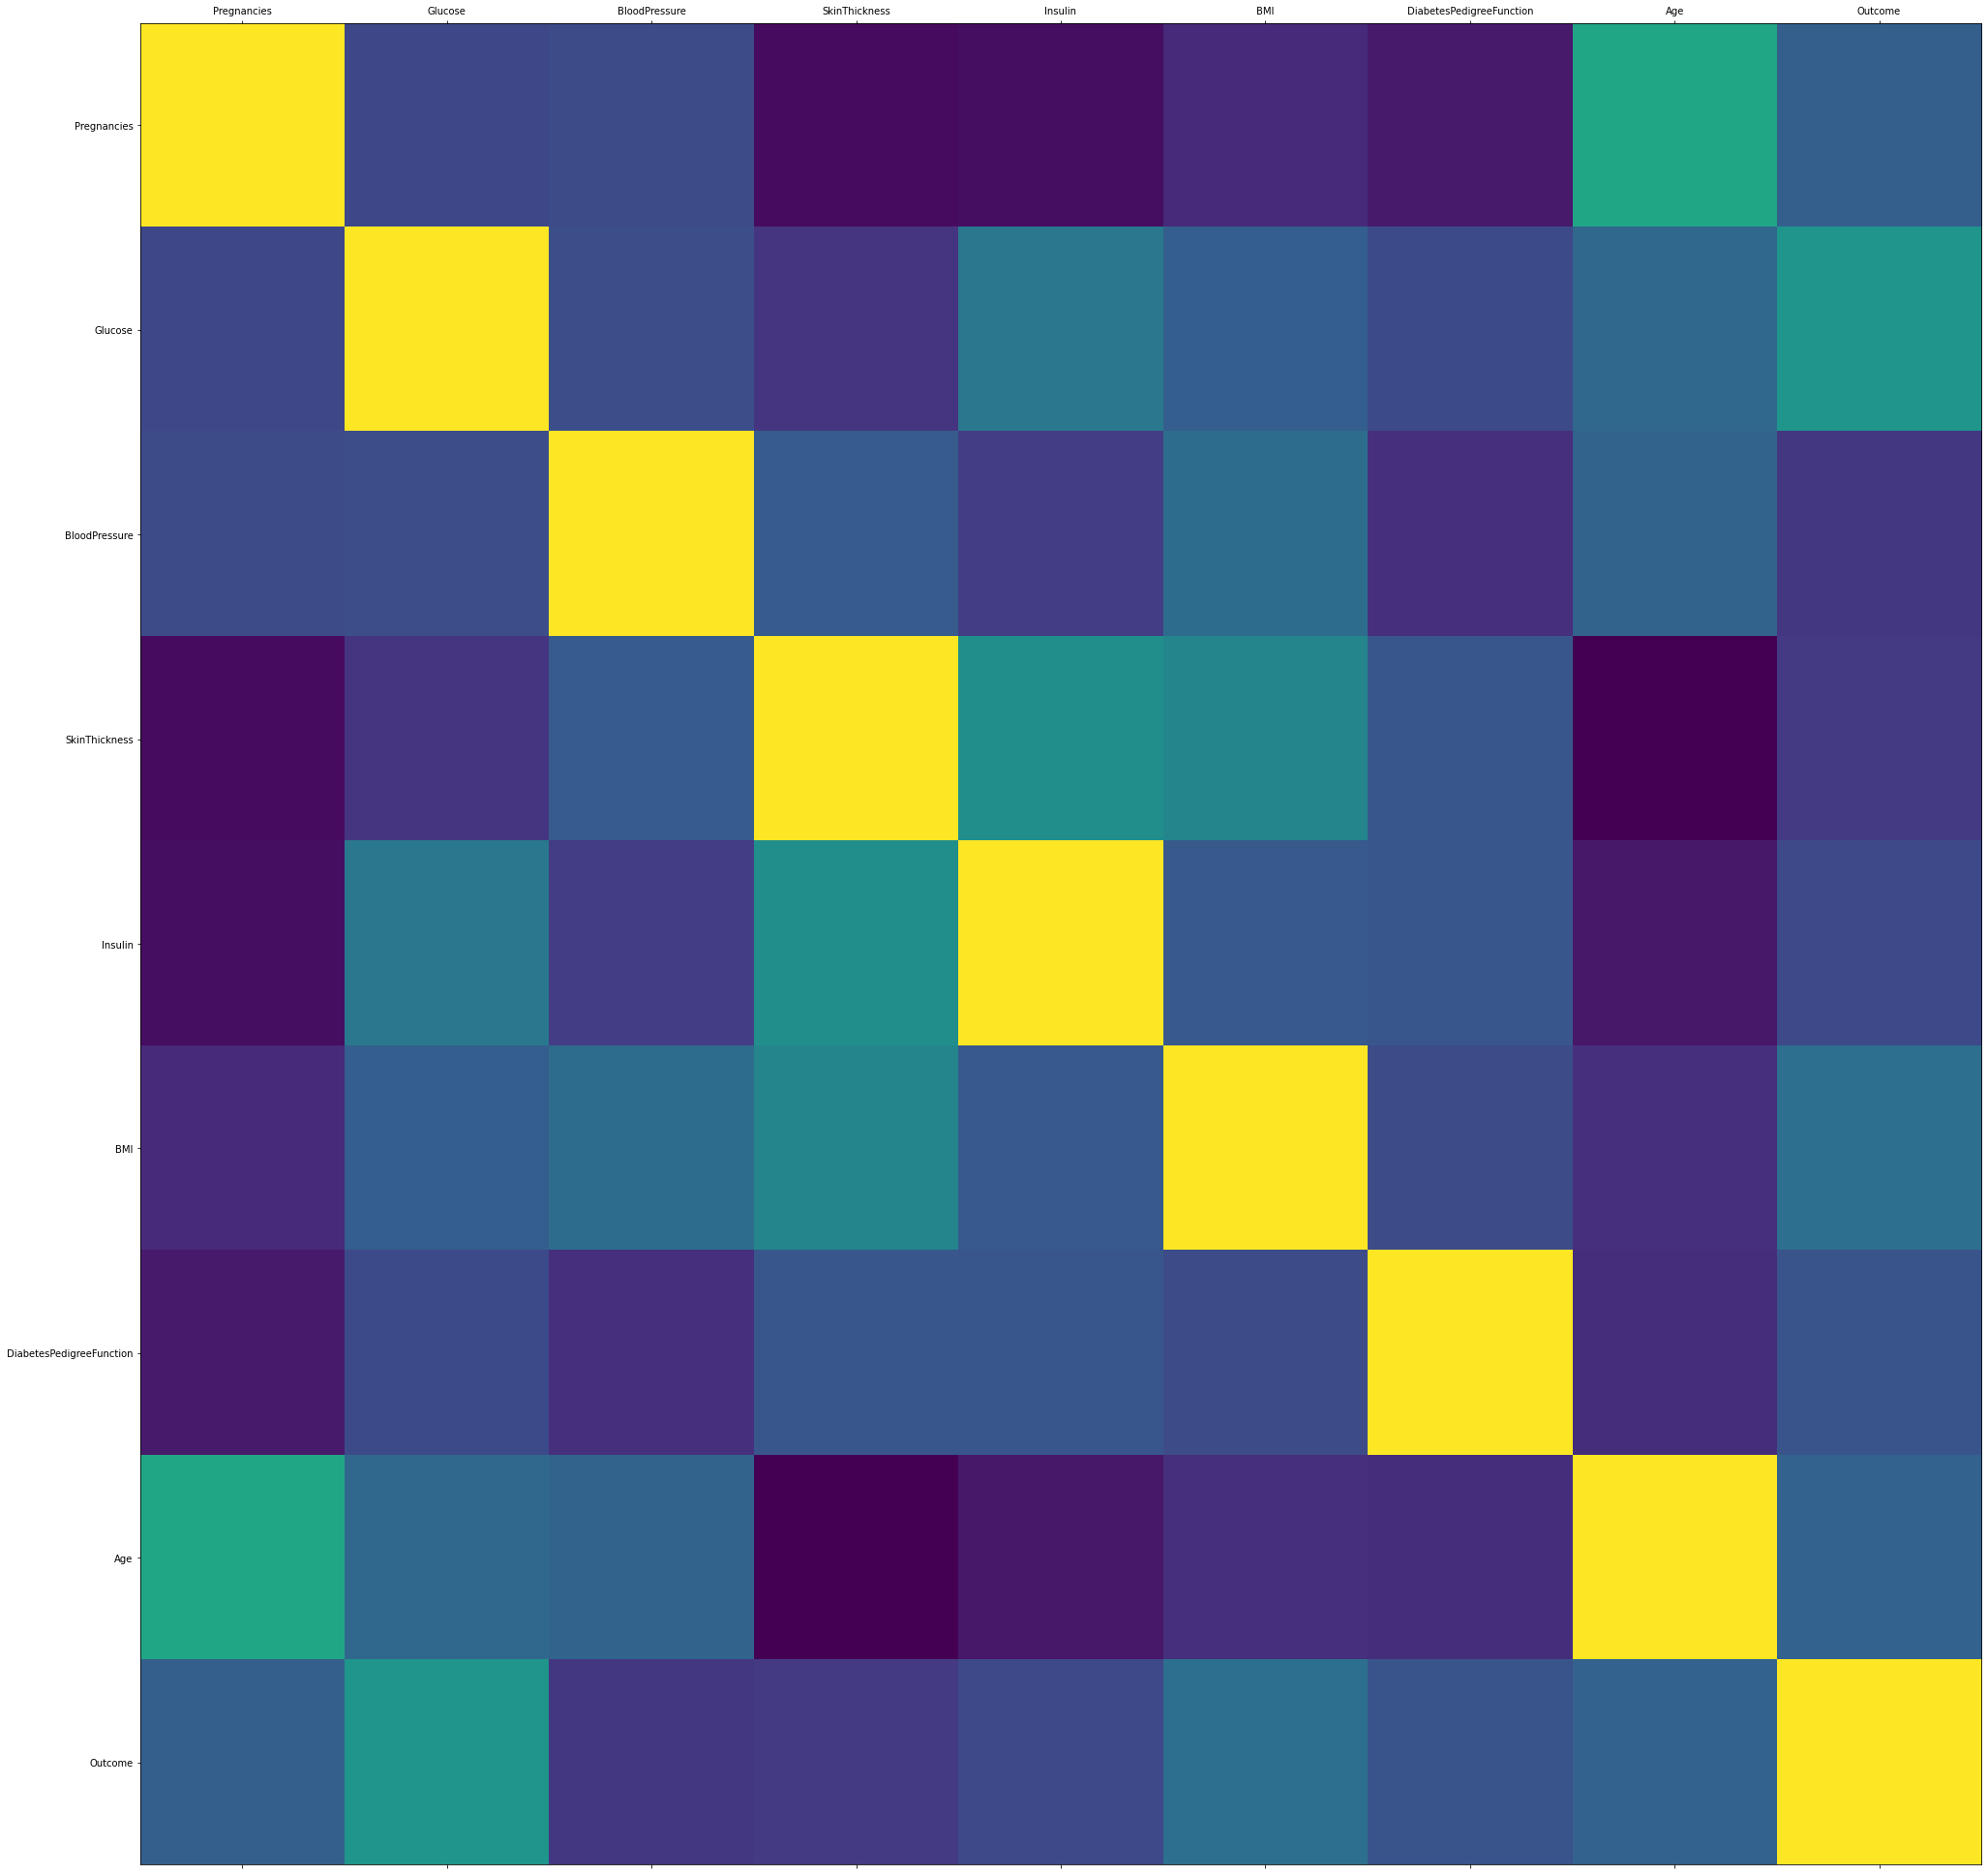

In [62]:
# Criando o gráfico - Matriz de Correlação..
plot_corr(df_diabetes)

In [63]:
# Spliting = 70% para dados de treino e 30% para dados de teste

In [64]:
from IPython.display import Image
Image('Treinamento.png')

In [65]:
#Definição dos conjuntos de treinamento e validação
x_treino, x_val, y_treino, y_val = train_test_split(data_treino, data_classif, test_size=0.30)

In [66]:
#Apresentacao dos dados selecionados para o conjunto de treinamento e validacao
print("-----------------------")
print("Conjunto de Treinamento")
print(x_treino)
print("Conjunto de Validacao")
print(x_val)
print("-----------------------")

-----------------------
Conjunto de Treinamento
[[  0.    105.     68.    ...  20.      0.236  22.   ]
 [  1.     92.     62.    ...  19.5     0.482  25.   ]
 [  1.     88.     78.    ...  32.      0.365  29.   ]
 ...
 [  0.    123.     72.    ...  36.3     0.258  52.   ]
 [  2.    122.     70.    ...  36.8     0.34   27.   ]
 [  7.    129.     68.    ...  38.5     0.439  43.   ]]
Conjunto de Validacao
[[  1.    133.    102.    ...  32.8     0.234  45.   ]
 [  8.    197.     74.    ...  25.9     1.191  39.   ]
 [  3.    158.     64.    ...  31.2     0.295  24.   ]
 ...
 [  3.    129.     64.    ...  26.4     0.219  28.   ]
 [  0.     73.      0.    ...  21.1     0.342  25.   ]
 [  0.    146.     82.    ...  40.5     1.781  44.   ]]
-----------------------


In [67]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(x_treino)/len(df_cancer_mama.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(x_val)/len(df_cancer_mama.index)) * 100))

76.82% nos dados de treino
33.05% nos dados de teste


In [38]:
# Aplicando o Algoritmo com o Naive Bayes - GaussianNB. - Primeiro Algoritmo.

In [98]:
# Utilizando um classificador Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [99]:
# Treinamento do modelo com os dados atribuidos ao conjunto de treinamento
modelo_NB = GaussianNB()
modelo_NB.fit(x_treino, y_treino)

GaussianNB(priors=None, var_smoothing=1e-09)

In [100]:
# Treinando o modelo
modelo_v1 = GaussianNB()
modelo_v1.fit(x_treino, y_treino.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

Tratando Valores Nulos ou Zerados.** **negrito**negrito**

In [102]:
from sklearn.impute import SimpleImputer

In [103]:
# Criando objeto
preenche_0 = SimpleImputer(missing_values = 0, strategy = "mean")

# Substituindo os valores iguais a zero, pela média dos dados
x_treino = preenche_0.fit_transform(x_treino)
x_val = preenche_0.fit_transform(x_val)

## **Verificando a Exatidão no Modelo de Dados do GaussianNB.**

In [104]:
from sklearn import metrics

In [107]:
nb_predict = modelo_NB.predict(x_val)

print(metrics.classification_report(y_val, nb_predict))
accuracy = metrics.accuracy_score(y_val, nb_predict)
average_accuracy = np.mean(y_val == nb_predict) * 100
print("The average_accuracy is - Base de Validação do modelo: {0:.1f}%".format(average_accuracy))


              precision    recall  f1-score   support

           0       0.82      0.78      0.80       159
           1       0.56      0.62      0.59        72

    accuracy                           0.73       231
   macro avg       0.69      0.70      0.70       231
weighted avg       0.74      0.73      0.74       231

The average_accuracy is - Base de Validação do modelo: 73.2%


# **Métricas com Matriz de Confusão - Falso Positivo x Falso Negativo**

In [109]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, nb_predict, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, nb_predict, labels = [1, 0]))

Confusion Matrix
[[ 45  27]
 [ 35 124]]

Classification Report
              precision    recall  f1-score   support

           1       0.56      0.62      0.59        72
           0       0.82      0.78      0.80       159

    accuracy                           0.73       231
   macro avg       0.69      0.70      0.70       231
weighted avg       0.74      0.73      0.74       231



# **Otimizando o Modelo com Algoritmo: RANDON FOREST**

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(x_treino, y_treino.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [114]:
# Verificando os dados de treino
rf_predict_train = modelo_v2.predict(x_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_treino, rf_predict_train)))

Exatidão (Accuracy): 1.0000


In [115]:
# Verificando nos dados de teste
rf_predict_test = modelo_v2.predict(x_val)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_val, rf_predict_test)))
print()

Exatidão (Accuracy): 0.7532



In [116]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, rf_predict_test, labels = [1, 0]))

Confusion Matrix
[[ 43  29]
 [ 28 131]]

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.60      0.60        72
           0       0.82      0.82      0.82       159

    accuracy                           0.75       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.75      0.75      0.75       231



# **Aplicando nova Otimização com a Regressão Logística**

In [117]:
from sklearn.linear_model import LogisticRegression

In [119]:
# Terceira versão do modelo usando Regressão Logística
modelo_v3 = LogisticRegression(C = 0.7, random_state = 42)
modelo_v3.fit(x_treino, y_treino.ravel())
lr_predict_test = modelo_v3.predict(x_val)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [120]:
print("Exatidão (Accuracy): na Base de Teste {0:.4f}".format(metrics.accuracy_score(y_val, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(y_val, lr_predict_test, labels = [1, 0]))

Exatidão (Accuracy): na Base de Teste 0.7446

Classification Report
              precision    recall  f1-score   support

           1       0.60      0.54      0.57        72
           0       0.80      0.84      0.82       159

    accuracy                           0.74       231
   macro avg       0.70      0.69      0.69       231
weighted avg       0.74      0.74      0.74       231



In [ ]:
### Resumindo
## Exatidão nos dados de teste (Validação do Modelo de Machine Learning)

# Modelo usando algoritmo Naive Bayes           = 0.7320
# Modelo usando algoritmo Random Forest         = 0.7532
# Modelo usando algoritmo Regressão Logística   = 0.7446